# Developing SIR Model - Python

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Warm up
solving the differential equation:
$
\frac{dy}{dt} = \alpha y\left(1-\frac{y}{K}\right)
$

In [2]:
def logistic_fn(y, t,  alpha, K):
    return alpha * y*(1-y/K)
t = np.arange(0, 40, 0.5)
alpha = np.log(2)
K = 100000

sol = odeint(logistic_fn, 1., t, args=(alpha, K))
sol[:4]

array([[1.        ],
       [1.41420771],
       [1.99998002],
       [2.82837549]])

Text(0.5, 1.0, 'Logistic function')

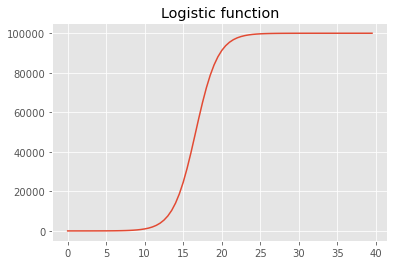

In [3]:
plt.plot(t, sol)
plt.title('Logistic function')

## Modelling an infected cohort
$
\frac{dI}{dt}=-\gamma I\\
\frac{dR}{dt}=\gamma I
$

In [49]:
def ri_model(t, y, gamma):
    I, R = y
    dydt = [-gamma * I, gamma * I]
    return dydt


In [54]:
t = np.linspace(0, 20, 20)
y = [100, 0]
gamma = 1/3

sol = odeint(ri_model,y, t, args=(gamma, ), tfirst= True)

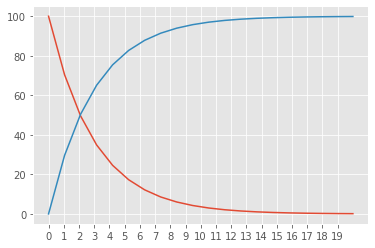

In [59]:
plt.plot(t, sol)
_ = plt.xticks(range(0, 20))

## Simulating competing hazards
$I$ (infected), $R$ (recovered), $M$ (dead)

$
\begin{align}
\frac{dI}{dt}&=-\gamma I -\mu I\\
\frac{dR}{dt}&= \mu I \\
\frac{dM}{dt}&= \gamma I
\end{align}
$

In [13]:
def irm_model(t, y, gamma, mu):
    I, R, M = y
    dydt = [-gamma * I - mu * I, mu * I, gamma * I]
    return dydt


In [14]:
t = np.arange(0, 20, 1)
y = [10000, 0, 0]
gamma = 0.7
mu = 0.3

sol = odeint(irm_model,y, t, args=(gamma, mu ), tfirst= True)
sol

array([[1.00000000e+04, 0.00000000e+00, 0.00000000e+00],
       [3.67879441e+03, 1.89636168e+03, 4.42484391e+03],
       [1.35335285e+03, 2.59399415e+03, 6.05265301e+03],
       [4.97870697e+02, 2.85063879e+03, 6.65149051e+03],
       [1.83156397e+02, 2.94505308e+03, 6.87179052e+03],
       [6.73794742e+01, 2.97978616e+03, 6.95283437e+03],
       [2.47875238e+01, 2.99256374e+03, 6.98264873e+03],
       [9.11882055e+00, 2.99726435e+03, 6.99361683e+03],
       [3.35462666e+00, 2.99899361e+03, 6.99765176e+03],
       [1.23409820e+00, 2.99962977e+03, 6.99913613e+03],
       [4.53999369e-01, 2.99986380e+03, 6.99968220e+03],
       [1.67017040e-01, 2.99994989e+03, 6.99988309e+03],
       [6.14421403e-02, 2.99998157e+03, 6.99995699e+03],
       [2.26033027e-02, 2.99999322e+03, 6.99998418e+03],
       [8.31529136e-03, 2.99999751e+03, 6.99999418e+03],
       [3.05902510e-03, 2.99999908e+03, 6.99999786e+03],
       [1.12535244e-03, 2.99999966e+03, 6.99999921e+03],
       [4.13993163e-04, 2.99999

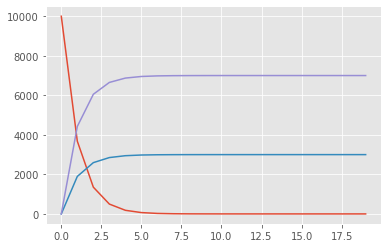

In [15]:
plt.plot(t, sol)

## SIR Model with a constant force of infection
$
\begin{align}
\frac{dS}{dt}&=-\lambda S\\
\frac{dI}{dt}&=\lambda S -\gamma I\\
\frac{dR}{dt}&=\gamma I
\end{align}
$

In [16]:
def sir_model(t, y, lambd, gamma ):
    S, I, R = y
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

In [17]:
t = np.arange(0, 30, 1)
y = [1000, 2, 0]
gamma = 0.03
lambd = 0.8

sol = odeint(sir_model,y, t, args=(lambd, gamma ), tfirst= True)
sol

array([[1.00000000e+03, 2.00000000e+00, 0.00000000e+00],
       [4.49328964e+02, 5.43360704e+02, 9.31033240e+00],
       [2.01896514e+02, 7.70577575e+02, 2.95259106e+01],
       [9.07179531e+01, 8.57114337e+02, 5.41677095e+01],
       [4.07622044e+01, 8.80899277e+02, 8.03385186e+01],
       [1.83156393e+01, 8.76934234e+02, 1.06750127e+02],
       [8.22974734e+00, 8.60933360e+02, 1.32836892e+02],
       [3.69786389e+00, 8.39944682e+02, 1.58357454e+02],
       [1.66155737e+00, 8.17122662e+02, 1.83215780e+02],
       [7.46585863e-01, 7.93872638e+02, 2.07380776e+02],
       [3.35462661e-01, 7.70814372e+02, 2.30850165e+02],
       [1.50733096e-01, 7.48214991e+02, 2.53634276e+02],
       [6.77287494e-02, 7.26183506e+02, 2.75748766e+02],
       [3.04324919e-02, 7.04758209e+02, 2.97211358e+02],
       [1.36742014e-02, 6.83945933e+02, 3.18040393e+02],
       [6.14421531e-03, 6.63739680e+02, 3.38254176e+02],
       [2.76077415e-03, 6.44126534e+02, 3.57870705e+02],
       [1.24049579e-03, 6.25091

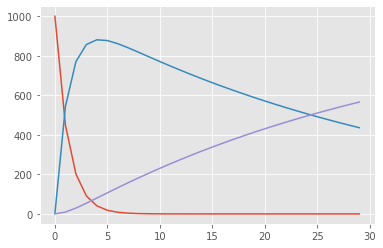

In [18]:
plt.plot(t, sol)

## SIR Model with a dynamic force of infection
$
\begin{align}
N & = S + I + R \\
\lambda & = \beta \frac{I}{N}\\
\frac{dS}{dt}&=-\lambda S\\
\frac{dI}{dt}&=\lambda S -\gamma I\\
\frac{dR}{dt}&=\gamma I
\end{align}
$

In [19]:
def sir_dynamic_model(t, y, beta, gamma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

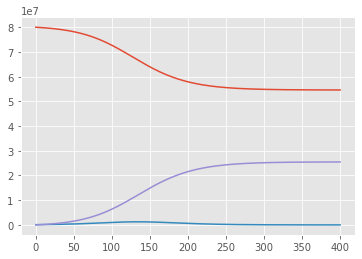

In [20]:
t = np.linspace(0, 400, 200)
y = [80000000, 100000, 0]
beta = 1.2/7
gamma = 1/7

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
#print(sol)
plt.plot(t, sol)

## SIR dynamics with varying parameters

infectious person infects 1 person on averate, every 2 days, and is infectious for 4 days:

$\beta$ =1 person/2 days = 0.5 days$^{-1}$  
$\gamma$ = 1/4 = 0.25 days$^{-1}$

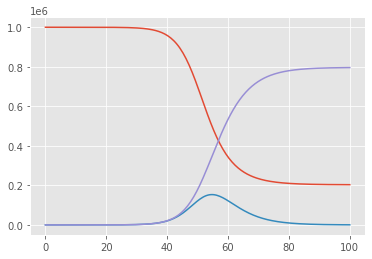

In [21]:
def sir_dynamic_model(t, y, beta, gamma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

t = np.linspace(0, 100, 200)
S = 1000000 -1
I = 1
R = 0
y = [S, I, R]
beta = 0.5
gamma = 0.25

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)

plt.plot(t, sol)

**Modelling a scenario where *beta* drops to 0.1 because of an infection control measure is introduced:**

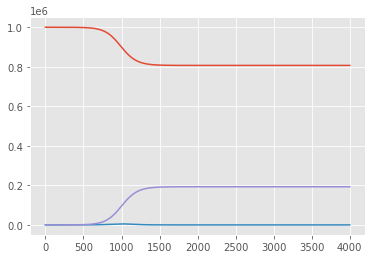

In [22]:
t = np.linspace(0, 4000, 1000)
S = 1000000 -1
I = 1
R = 0
y = [S, I, R]
beta = 0.1
gamma = 0.09

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)

plt.plot(t, sol)

## Simulating the effective reproduction number R<sub>eff</sub>

$
R_{\text{eff}} = R_0 \frac{S}{N}
$

Text(0.5, 1.0, 'R$_{eff}$')

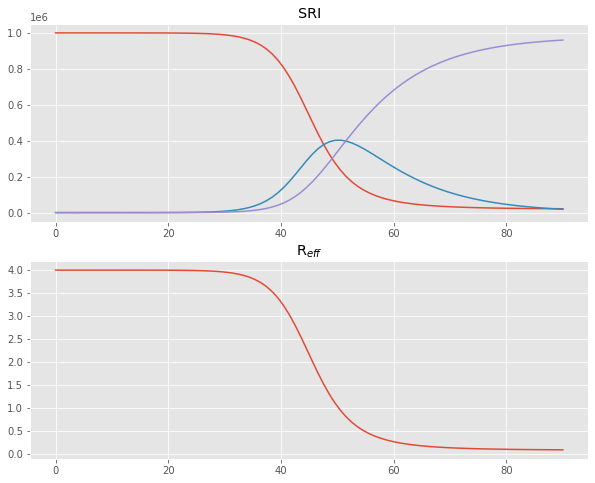

In [23]:
t = np.linspace(0, 90, 90)
S = 1000000 -1
I = 1
R = 0
N = S + I + R
y = [S, I, R]
beta = 0.4
gamma = 0.1

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)
fig, ax = plt.subplots(2,1, figsize=(10,8))
#plt.subplot(2,1,1)
ax[0].plot(t, sol)
ax[0].set_title('SRI')
ax[1].plot(t,(beta/gamma) * sol[:, 0] / N)
ax[1].set_title('R$_{eff}$')


### Modelling population turnover

$b$ = birth rate  
$\mu$ = mortality rate

$
\begin{align}
N & = S + I + R \\
\lambda & = \beta \frac{I}{N}\\
\frac{dS}{dt}&=-\lambda S + b N - \mu S\\
\frac{dI}{dt}&=\lambda S -\gamma I -\mu I\\
\frac{dR}{dt}&=\gamma I - \mu R
\end{align}
$

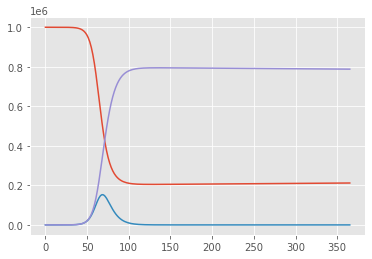

In [24]:
def sir_dynamic_model_with_turnover(t, y, beta, gamma, b, mu ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S + b* N - mu * S, lambd*S - gamma *I-mu*I, gamma * I - mu * R]
    return dydt

t = np.linspace(0, 365, 200)
S = 1000000 -1
I = 1
R = 0
y = [S, I, R]
beta = 0.4
gamma = 0.2
mu = 1/(70*365)
b = mu

sol = odeint(sir_dynamic_model_with_turnover,y, t, args=(beta, gamma, b, mu ), tfirst= True)

plt.plot(t, sol)

### Simple vaccination model
assuming a proportion $p$ of $N$ is vaccinated

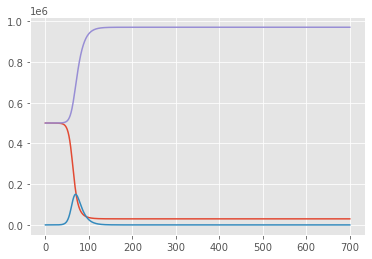

In [30]:
def sir_dynamic_model(t, y, beta, gamma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S, lambd*S - gamma *I, gamma * I]
    return dydt

t = np.linspace(0, 700, 700)
N = 1000000
p = 0.5
S = (1-p)*N -1
I = 1
R = p * N
y = [S, I, R]
beta = 0.6
gamma = 0.1

sol = odeint(sir_dynamic_model,y, t, args=(beta, gamma ), tfirst= True)

plt.plot(t, sol)

### Waning immunity
$
\begin{align}
N & = S + I + R \\
\lambda & = \beta \frac{I}{N}\\
\frac{dS}{dt}&=-\lambda S + \sigma R\\
\frac{dI}{dt}&=\lambda S -\gamma I\\
\frac{dR}{dt}&=\gamma I - \sigma R
\end{align}
$

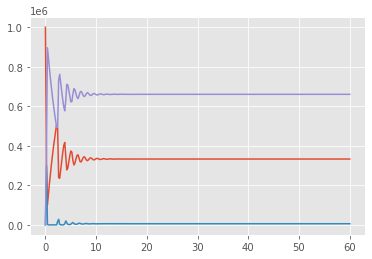

In [44]:
def sir_dynamic_model_waning_imm(t, y, beta, gamma, sigma ):
    S, I, R = y
    N = S + I + R
    lambd = beta * I/N
    dydt = [-lambd * S + sigma*R, lambd*S - gamma *I, gamma * I - sigma*R]
    return dydt
t = np.linspace(0, 60, 300)
N = 1000000
p = 0.5
S = N - 1
I = 1
R = 0
y = [S, I, R]
beta = 0.3*365
gamma = 0.1*365
sigma = 1/3
sol = odeint(sir_dynamic_model_waning_imm,y, t, args=(beta, gamma, sigma ), tfirst= True)
plt.plot(t, sol)

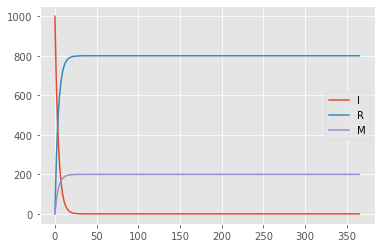

In [48]:
def sir_dynamic_model_IR(t, y, gamma, mu ):
    I, R, M = y
    dydt = [-mu * I - gamma * I,  gamma * I,  mu * I]
    return dydt

t = np.linspace(0, 365, 200)
I = 1000
R = 0
M = 0
y = [I, R, M]
gamma = 0.2
mu = 0.05

sol = odeint(sir_dynamic_model_IR,y, t, args=(gamma, mu ), tfirst= True)

plt.plot(t, sol[:,0], label='I')
plt.plot(t, sol[:,1], label='R')
plt.plot(t, sol[:,2], label = 'M')
plt.legend()